# Tracking Bright Spots Detected by Laplacian of Gaussian filter

In [ ]:
%pip install -q --upgrade scikit-image napari pandas numpy matplotlib laptrack

## Importing packages

`laptrack.LapTrack` is the core object for tracking. We also import `blob_log` from `skimage` to detect bright spots.

In [1]:
import napari
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from skimage.feature import blob_log

from laptrack import LapTrack

## Loading images and showing in napari

In [2]:
viewer = napari.Viewer()
images = np.load("bright_spots_data/brownian_particles_images_with_noise_small.npz")[
    "images"
]
viewer.add_image(images)

<Image layer 'images' at 0x17acf32e0>

## Detecting spots by Laplacian of Gaussian filter

In [3]:
spots = []
for frame, image in enumerate(images):
    _spots = blob_log(image, min_sigma=1, max_sigma=3, num_sigma=3, overlap=0.5)
    df = pd.DataFrame(_spots, columns=["y", "x", "sigma"])
    df["frame"] = frame
    spots.append(df)
spots_df = pd.concat(spots)
viewer.add_points(
    spots_df[["frame", "y", "x"]], size=3, edge_color="yellow", face_color="#ffffff00"
)

<Points layer 'Points' at 0x17fcacc40>

## Tracking by LapTrack

In [4]:
lt = LapTrack(track_cost_cutoff=5**2)
track_df, _, _ = lt.predict_dataframe(spots_df, ["y", "x"], only_coordinate_cols=False)
track_df = track_df.reset_index()
viewer.add_tracks(track_df[["track_id", "frame", "y", "x"]], tail_length=50)

<Tracks layer 'Tracks' at 0x185e0bdc0>

([], [])

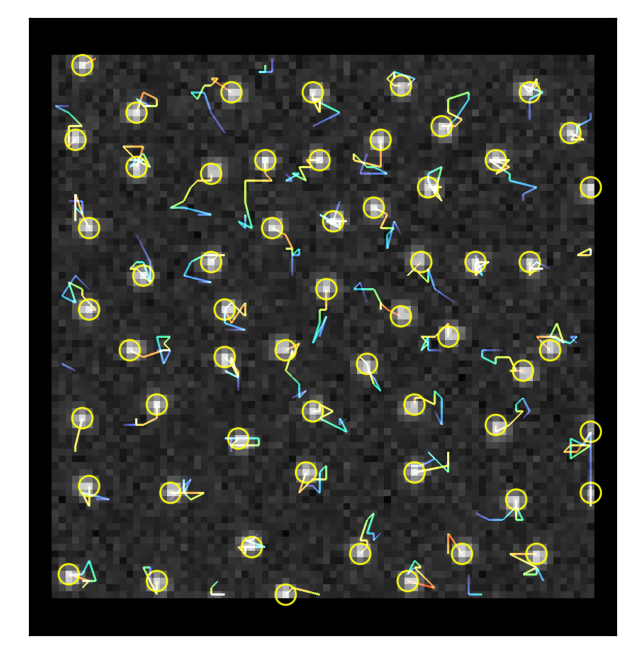

In [5]:
viewer.dims.current_step = (9, 0, 0)
plt.imshow(viewer.screenshot())
plt.xticks([])
plt.yticks([])